In [166]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
#plotting
import matplotlib.pyplot as plt
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/test_notebooks/../../analysis/tools/sidm_processor.py'>

In [167]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "sample" : sample_name, 
    },
).events()

In [168]:
events.pv.fields
(events.ljsource[0, 0].p4 + events.ljsource[0, 1].p4).pt
events.ljsource.p4.sum().pt

<Array [42.5, 35.6, 18.1, ... 32.6, 71.7, 31.6] type='18359 * float32'>

In [169]:
p = sidm_processor.SidmProcessor()
out = p.process(events)

In [170]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': {'4mu': <analysis.tools.cutflow.Cutflow at 0x7efde55cc490>,
   '2mu2e': <analysis.tools.cutflow.Cutflow at 0x7efde6ae58b0>},
  'hists': {'pv_n': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Integer(0, 100, name='pv_n', label='pv_n'),
     storage=Double()) # Sum: 2335.0,
   'pv_ndof': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Integer(0, 20, name='pv_ndof', label='pv_ndof'),
     storage=Double()) # Sum: 26453.0 (61403.0 with flow),
   'pv_z': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Regular(100, -50, 50, name='pv_z', label='pv_z'),
     storage=Double()) # Sum: 61403.0,
   'pv_rho': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel', label='channel'),
     Regular(100, -0.5, 0.5, name='pv_rho', label='pv_rho'),
     storage=Double()) # Sum: 61403.0,
   'lj_n': Hist(
     StrCategory(['4mu', '2mu2e'], name='channe

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde55cce20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

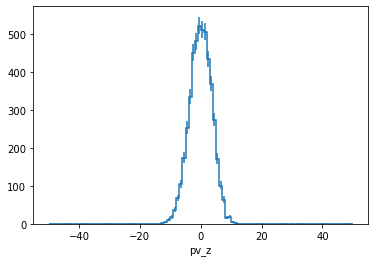

In [171]:
out[sample_name]["hists"]["pv_z"]["4mu", :].plot1d()

In [172]:
out[sample_name]["cutflow"]["2mu2e"].print_table()

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection               18359        18359
PV filter                  18359        18359
Cosmic veto                18359        18359
>=2 LJs                     2339         2339
2mu2e                       2158         2158


In [173]:
out[sample_name]["cutflow"]["2mu2e"].print_table(fraction=True)

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                 12.7          12.7            12.7
2mu2e                   11.8          92.3            11.8


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde45dd400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

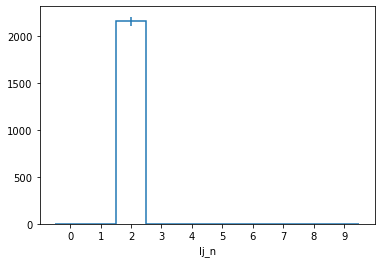

In [174]:
out[sample_name]["hists"]["lj_n"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde45d2340>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

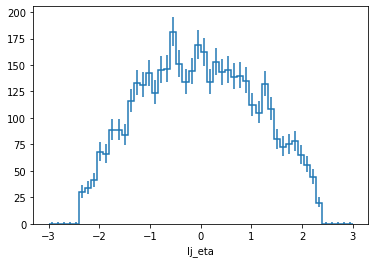

In [175]:
out[sample_name]["hists"]["lj_eta"]["2mu2e", :].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde4509a00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

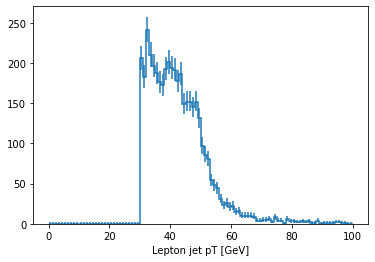

In [176]:
out[sample_name]["hists"]["lj_pt_type"]["2mu2e", :, :].project("lj_pt").plot1d()

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7efde43ec4c0>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde43fba00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde43b2c40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

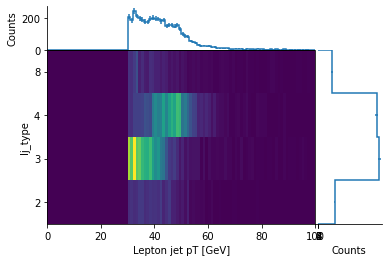

In [177]:
out[sample_name]["hists"]["lj_pt_type"]["2mu2e", :, :].plot2d_full()

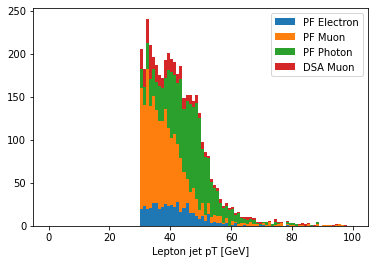

In [178]:
lj_type_names = {
    2 :"PF Electron",
    3 :"PF Muon",
    4 :"PF Photon",
    8 :"DSA Muon",
}
out[sample_name]["hists"]["lj_pt_type"]["2mu2e", :, :].stack("lj_type").plot(stack=True, histtype="fill")
plt.legend(lj_type_names.values())
plt.show()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde42a1430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

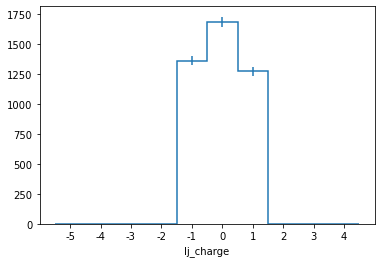

In [179]:
out[sample_name]["hists"]["lj_charge"]["2mu2e", :].plot1d()

In [180]:
ljs = events.ljsource
#ljs = ak.mask(ljs, ak.num(ljs) >= 2)
ljs = ljs[ak.argsort(ljs.p4.pt, ascending=False)]
ljs.p4.pt[ak.num(ljs) >= 2, 1]
print(ak.num(ljs.p4.pt))
print(ak.num(ljs["type"]))

[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde4221ac0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde41e0f40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

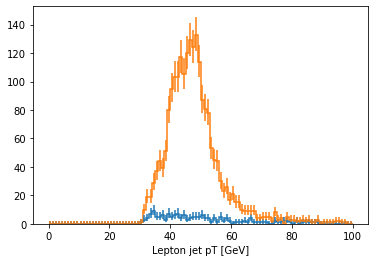

In [181]:
out[sample_name]["hists"]["lj_0_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde4102460>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde41139a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

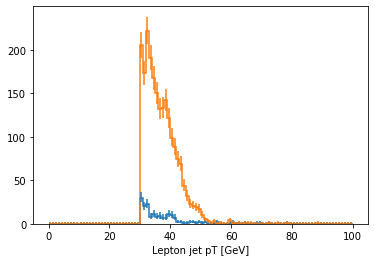

In [182]:
out[sample_name]["hists"]["lj_1_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde404cee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde406f820>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

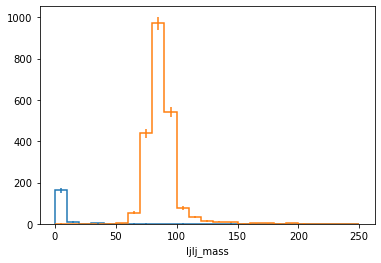

In [183]:
out[sample_name]["hists"]["lj_lj_invmass"][:, :250j].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efde408c580>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efdd3f4ceb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

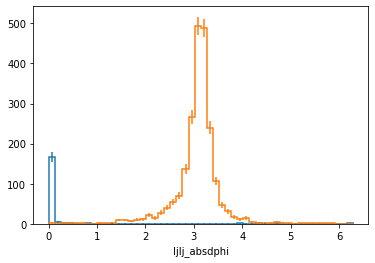

In [184]:
out[sample_name]["hists"]["lj_lj_absdphi"].plot1d()